In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive"


'10 (1).pdf'
 10.pdf
'12th-compress (1).pdf'
'12th-compress (2).pdf'
 3113763.pdf
 aptos2019-blindness-detection.zip
 Certificate_95705366.pdf
 Certificates
 Classroom
'Colab Notebooks'
'Completion Certificate _ SkillsBuild.pdf'
'Copy of Lean_canvas_RuyA (1).pdf'
'Copy of Lean_canvas_RuyA.pdf'
'Copy of lec10.pdf'
'Copy of lec11.pdf'
'Copy of lec12.pdf'
'Copy of lec13.pdf'
'Copy of lec14.pdf'
'Copy of lec15.pdf'
'Copy of lec16.pdf'
'Copy of lec17.pdf'
'Copy of lec18.pdf'
'Copy of lec19.pdf'
'Copy of lec1.pdf'
'Copy of lec20.pdf'
'Copy of lec21.pdf'
'Copy of lec22.pdf'
'Copy of lec23.pdf'
'Copy of lec24.pdf'
'Copy of lec25.pdf'
'Copy of lec26.pdf'
'Copy of lec27.pdf'
'Copy of lec28.pdf'
'Copy of lec29.pdf'
'Copy of lec2.pdf'
'Copy of lec30.pdf'
'Copy of lec31.pdf'
'Copy of lec32.pdf'
'Copy of lec33.pdf'
'Copy of lec34.pdf'
'Copy of lec35.pdf'
'Copy of lec36.pdf'
'Copy of lec37.pdf'
'Copy of lec38.pdf'
'Copy of lec39.pdf'
'Copy of lec3.pdf'
'Copy of lec40.pdf'
'Copy of lec41.pdf'
'Copy of

In [ ]:
!unzip -q "/content/drive/MyDrive/aptos2019-blindness-detection.zip" -d /content/aptos2019-blindness-detection

In [ ]:
!ls /content/aptos2019-blindness-detection


sample_submission.csv  test.csv  test_images  train.csv  train_images


In [ ]:
import pandas as pd
import cv2
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# 1. Load dataset
train_df = pd.read_csv("/content/aptos2019-blindness-detection/train.csv")
train_path = "/content/aptos2019-blindness-detection/train_images"

images, labels = [], []

for idx, row in train_df.iterrows():
    img_path = os.path.join(train_path, row['id_code'] + ".png")  # change to .jpeg if dataset uses jpeg
    img = cv2.imread(img_path)
    if img is None:
        print(f"⚠️ Image not found: {img_path}")
        continue
    img = cv2.resize(img, (224, 224))
    images.append(img)
    labels.append(row['diagnosis'])

X = np.array(images, dtype=np.float32) / 255.0
y = np.array(labels)

print("Dataset:", X.shape, y.shape)


Dataset: (3662, 224, 224, 3) (3662,)


In [ ]:
# 2. Train/validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)

Train set: (2929, 224, 224, 3) (2929,)
Validation set: (733, 224, 224, 3) (733,)


In [ ]:
# 3. CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')  # 5 classes
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,245,957 (84.86 MB)

 Trainable params: 22,245,957 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 4. Train model
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 143ms/step - accuracy: 0.5755 - loss: 1.2722 - val_accuracy: 0.7135 - val_loss: 0.8260
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.7212 - loss: 0.7828 - val_accuracy: 0.7080 - val_loss: 0.8116
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7184 - loss: 0.8099 - val_accuracy: 0.7149 - val_loss: 0.8036
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7232 - loss: 0.7603 - val_accuracy: 0.7231 - val_loss: 0.7657
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.7237 - loss: 0.7459 - val_accuracy: 0.7162 - val_loss: 0.7836
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7314 - loss: 0.7229 - val_accuracy: 0.7231 - val_loss: 0.7684
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.7350 - loss: 0.7084 - val_accuracy: 0.7340 - val_loss: 0.7709
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7427 - loss: 0.6889 - val_accuracy: 0.7326 -

In [ ]:
# 5. Evaluate model
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=2)
print("Validation Accuracy:", val_acc)

23/23 - 1s - 23ms/step - accuracy: 0.7353 - loss: 0.8625
Validation Accuracy: 0.7353342175483704


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.9307    0.9307    0.9307       361
           1     0.4444    0.3784    0.4088        74
           2     0.6325    0.7400    0.6820       200
           3     0.4828    0.3590    0.4118        39
           4     0.2826    0.2203    0.2476        59

    accuracy                         0.7353       733
   macro avg     0.5546    0.5257    0.5362       733
weighted avg     0.7243    0.7353    0.7276       733



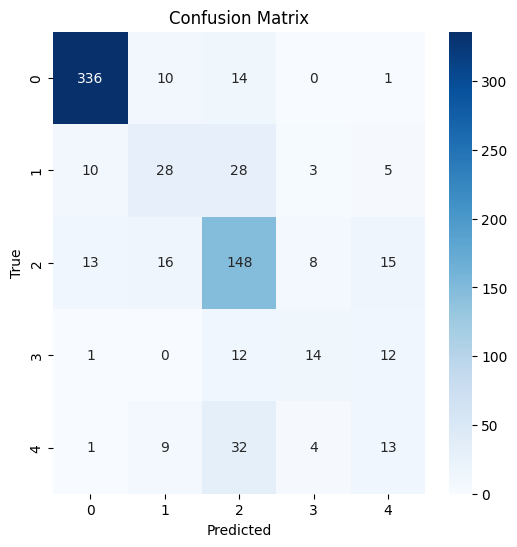

In [ ]:
# 6. Classification report & Confusion matrix
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\nClassification Report:")
print(classification_report(y_val, y_pred, digits=4))

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3,4], yticklabels=[0,1,2,3,4])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

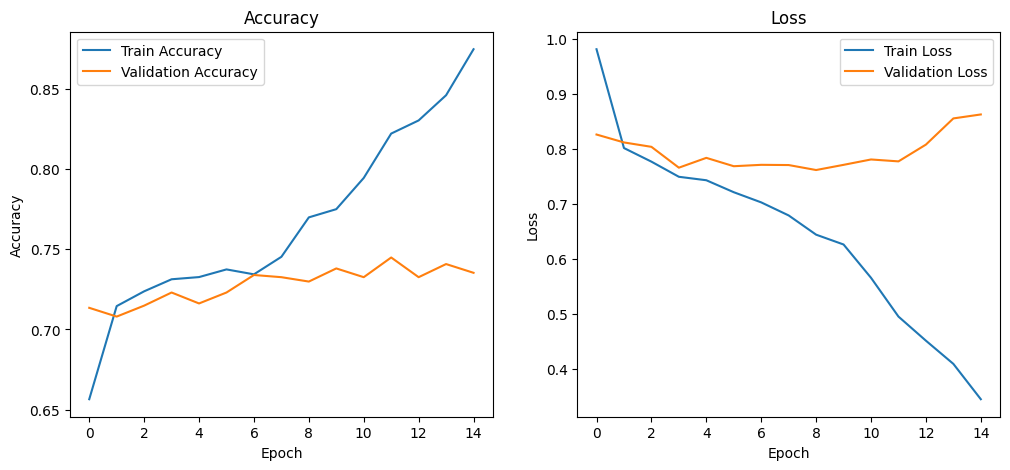

In [ ]:
# 7. Plot accuracy and loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

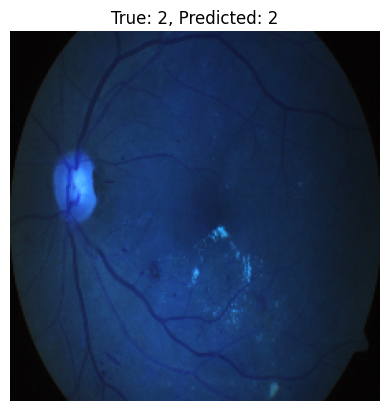

In [ ]:
# 8. Show a sample prediction
idx = np.random.randint(0, X_val.shape[0])
sample_img = X_val[idx]
true_label = y_val[idx]
pred_label = y_pred[idx]

plt.imshow(sample_img)
plt.title(f"True: {true_label}, Predicted: {pred_label}")
plt.axis("off")
plt.show()